In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
undersample = RandomUnderSampler(sampling_strategy=0.5)
oversample = RandomOverSampler(sampling_strategy='minority')
from scipy.stats import zscore
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import array
from sklearn.model_selection import LeaveOneOut
from sklearn.utils import resample
from matplotlib import pyplot
from sklearn.svm import SVC
import pickle

# 1. Import and understand the data.

1.A. Import ‘signal-data.csv’ as DataFrame.

In [2]:
df=pd.read_csv('signal-data.csv')

In [3]:
df.shape

(1567, 592)

1.B. Print 5 point summary and share at least 2 observations.

In [4]:
pd.set_option("display.max_rows", None)

In [5]:
df.head(10)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


In [6]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.31680,1.525700,1114.5366
5,1553.0,100.000000,0.000000,100.0000,100.000000,100.00000,100.000000,100.0000
6,1553.0,101.112908,6.237214,82.1311,97.920000,101.51220,104.586700,129.2522
7,1558.0,0.121822,0.008961,0.0000,0.121100,0.12240,0.123800,0.1286
8,1565.0,1.462862,0.073897,1.1910,1.411200,1.46160,1.516900,1.6564
9,1565.0,-0.000841,0.015116,-0.0534,-0.010800,-0.00130,0.008400,0.0749


Observations:
    1.591 Featues having continous values 
    2.Few of features (( 5,13,42,49,etc...)having standard deviation as 0 which implies they have single value 
    3.Featue pass/Fail has only 2 values( 1, -1)

# 2. Data cleansing: 

2.A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [7]:
# Function to remove Null value columns above threshold will be removed. 
#Also remaining Null values will be imputed as median
def null_feature_remove(df,threshold):
    cols = list(df)
    for column in cols:
        col_data = df[column]
        missing_data=df[column].isnull().sum() /df.shape[0] * 100.00
        if ( missing_data > threshold ):
            df.drop(column, axis=1, inplace=True)
        elif (missing_data > 0):
            col_median = col_data.median()
            col_data.fillna(col_median, inplace=True)
            df[column] = col_data
    return df

In [8]:
df=null_feature_remove(df,20)

In [9]:
df.shape

(1567, 560)

32 Features removed due to more than 20% Null 

2.B. Identify and drop the features which are having same value for all the rows

In [10]:
low_card_cols_1 =df.columns[df.nunique()==1].tolist()

In [11]:
print(low_card_cols_1)

['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


In [12]:
df =df.drop(low_card_cols_1,axis=1)

In [13]:
df.shape

(1567, 444)

2.c.Drop other features if required using relevant functional knowledge. Clearly justify the same.

Time feature has unique values for each row. So it won't create any impact on output

In [14]:
df.drop('Time', axis=1, inplace=True)

In [15]:
df.shape

(1567, 443)

2.D. Check for multi-collinearity in the data and take necessary action.

In [16]:
def remove_collinear_features(x, threshold):
    threshold =0.70
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
                # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
    drops = set(drop_cols)
    features1 = x.drop(columns=drops)
    return(features1)


In [17]:
df=remove_collinear_features(df,.70)

In [18]:
df.shape

(1567, 202)

2.E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

1.Features having unique value across rows removed.Becuase it has 0 Std which will not give impact on Algorithm
2.Time feature removed becuase it won't impact target prediction
3.Features which have multi-collinear removed

# 3. Data analysis & visualisation

3A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

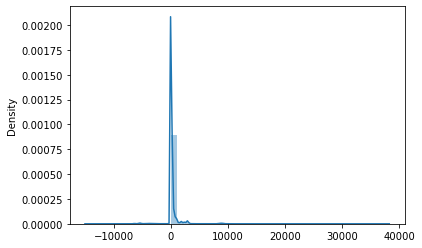

In [19]:
sns.distplot(df)

Observation: 
    Data is not Normal Curve.
    It is Positve Skewd 
    Data has lot of outliers 

In [20]:
unique_vals = df['Pass/Fail'].unique() 
unique_vals

array([-1,  1])

In [21]:
targets = [df.loc[df['Pass/Fail'] == val] for val in unique_vals]

In [22]:
targets

[            0         1          2          3          4         6       7  \
 0     3030.93  2564.000  2187.7333  1411.1265     1.3602   97.6133  0.1242   
 1     3095.78  2465.140  2230.4222  1463.6606     0.8294  102.3433  0.1247   
 3     2988.72  2479.900  2199.0333   909.7926     1.3204  104.2367  0.1217   
 4     3032.24  2502.870  2233.3667  1326.5200     1.5334  100.3967  0.1235   
 5     2946.25  2432.840  2233.3667  1326.5200     1.5334  100.3967  0.1235   
 6     3030.27  2430.120  2230.4222  1463.6606     0.8294  102.3433  0.1247   
 7     3058.88  2690.150  2248.9000  1004.4692     0.7884  106.2400  0.1185   
 8     2967.68  2600.470  2248.9000  1004.4692     0.7884  106.2400  0.1185   
 9     3016.11  2428.370  2248.9000  1004.4692     0.7884  106.2400  0.1185   
 12    2920.07  2507.400  2195.1222  1046.1468     1.3204  103.3400  0.1223   
 13    3051.44  2529.270  2184.4333   877.6266     1.4668  107.8711  0.1240   
 15    2988.31  2546.260  2224.6222   947.7739     1

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distr

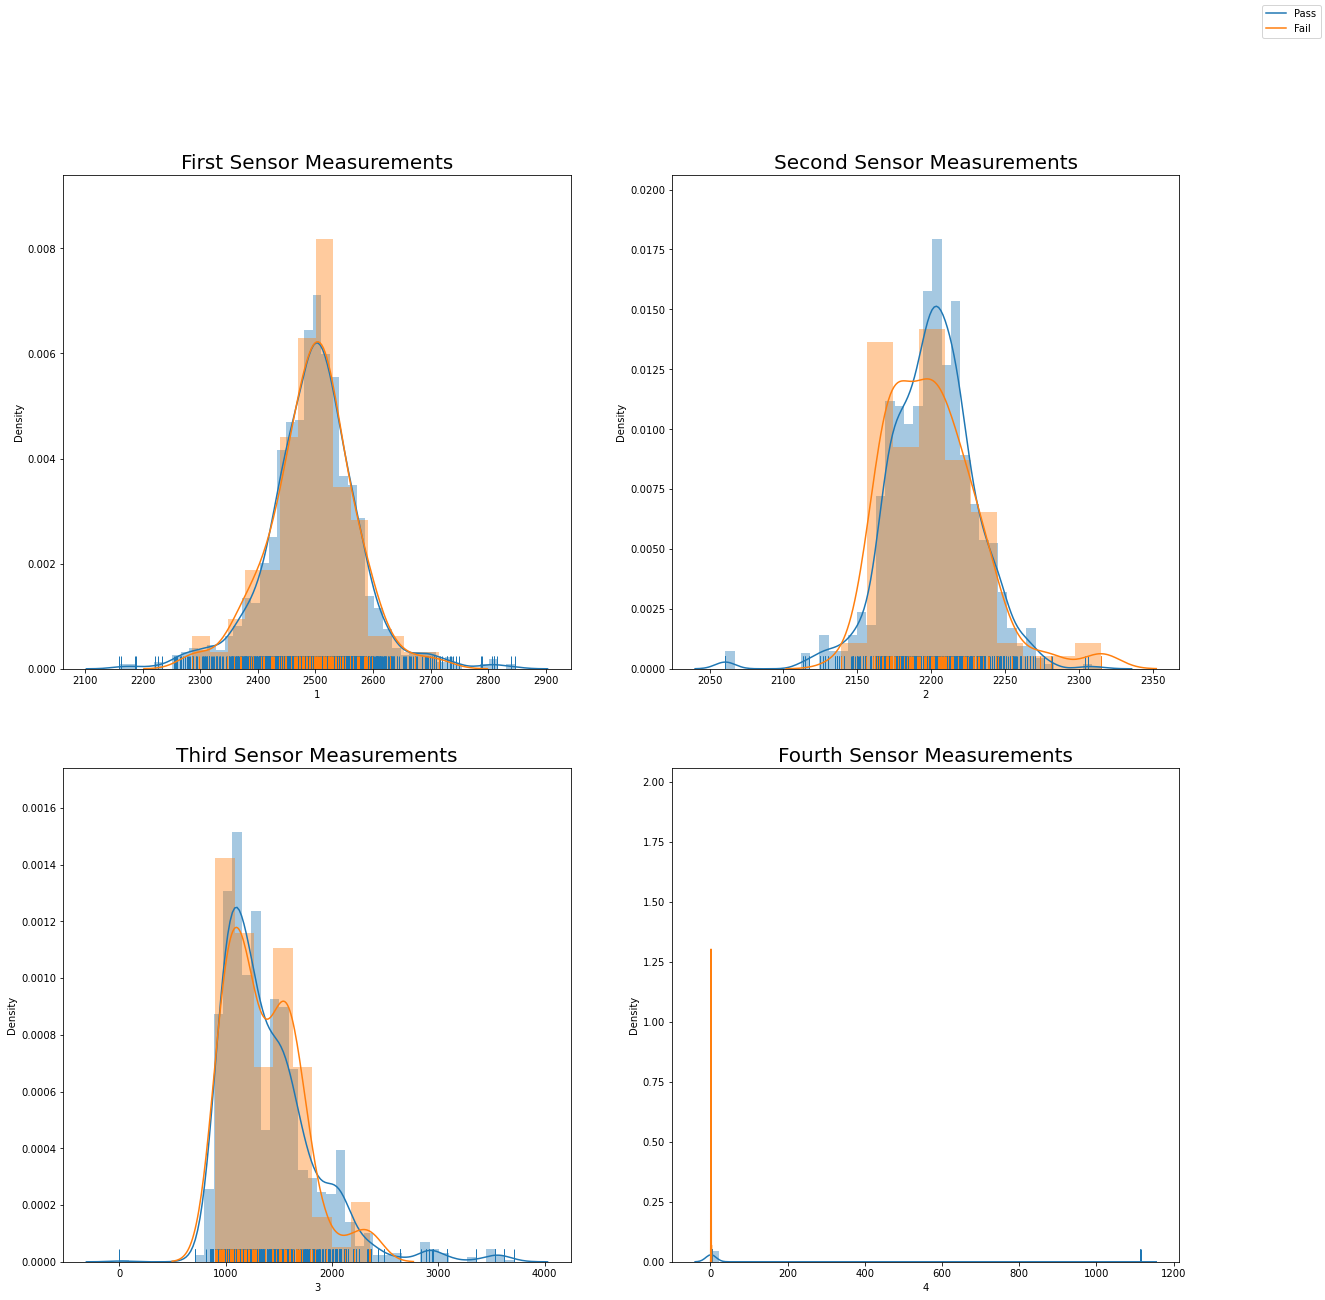

In [23]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()

3B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

In [24]:
corrMatrix = df.corr()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


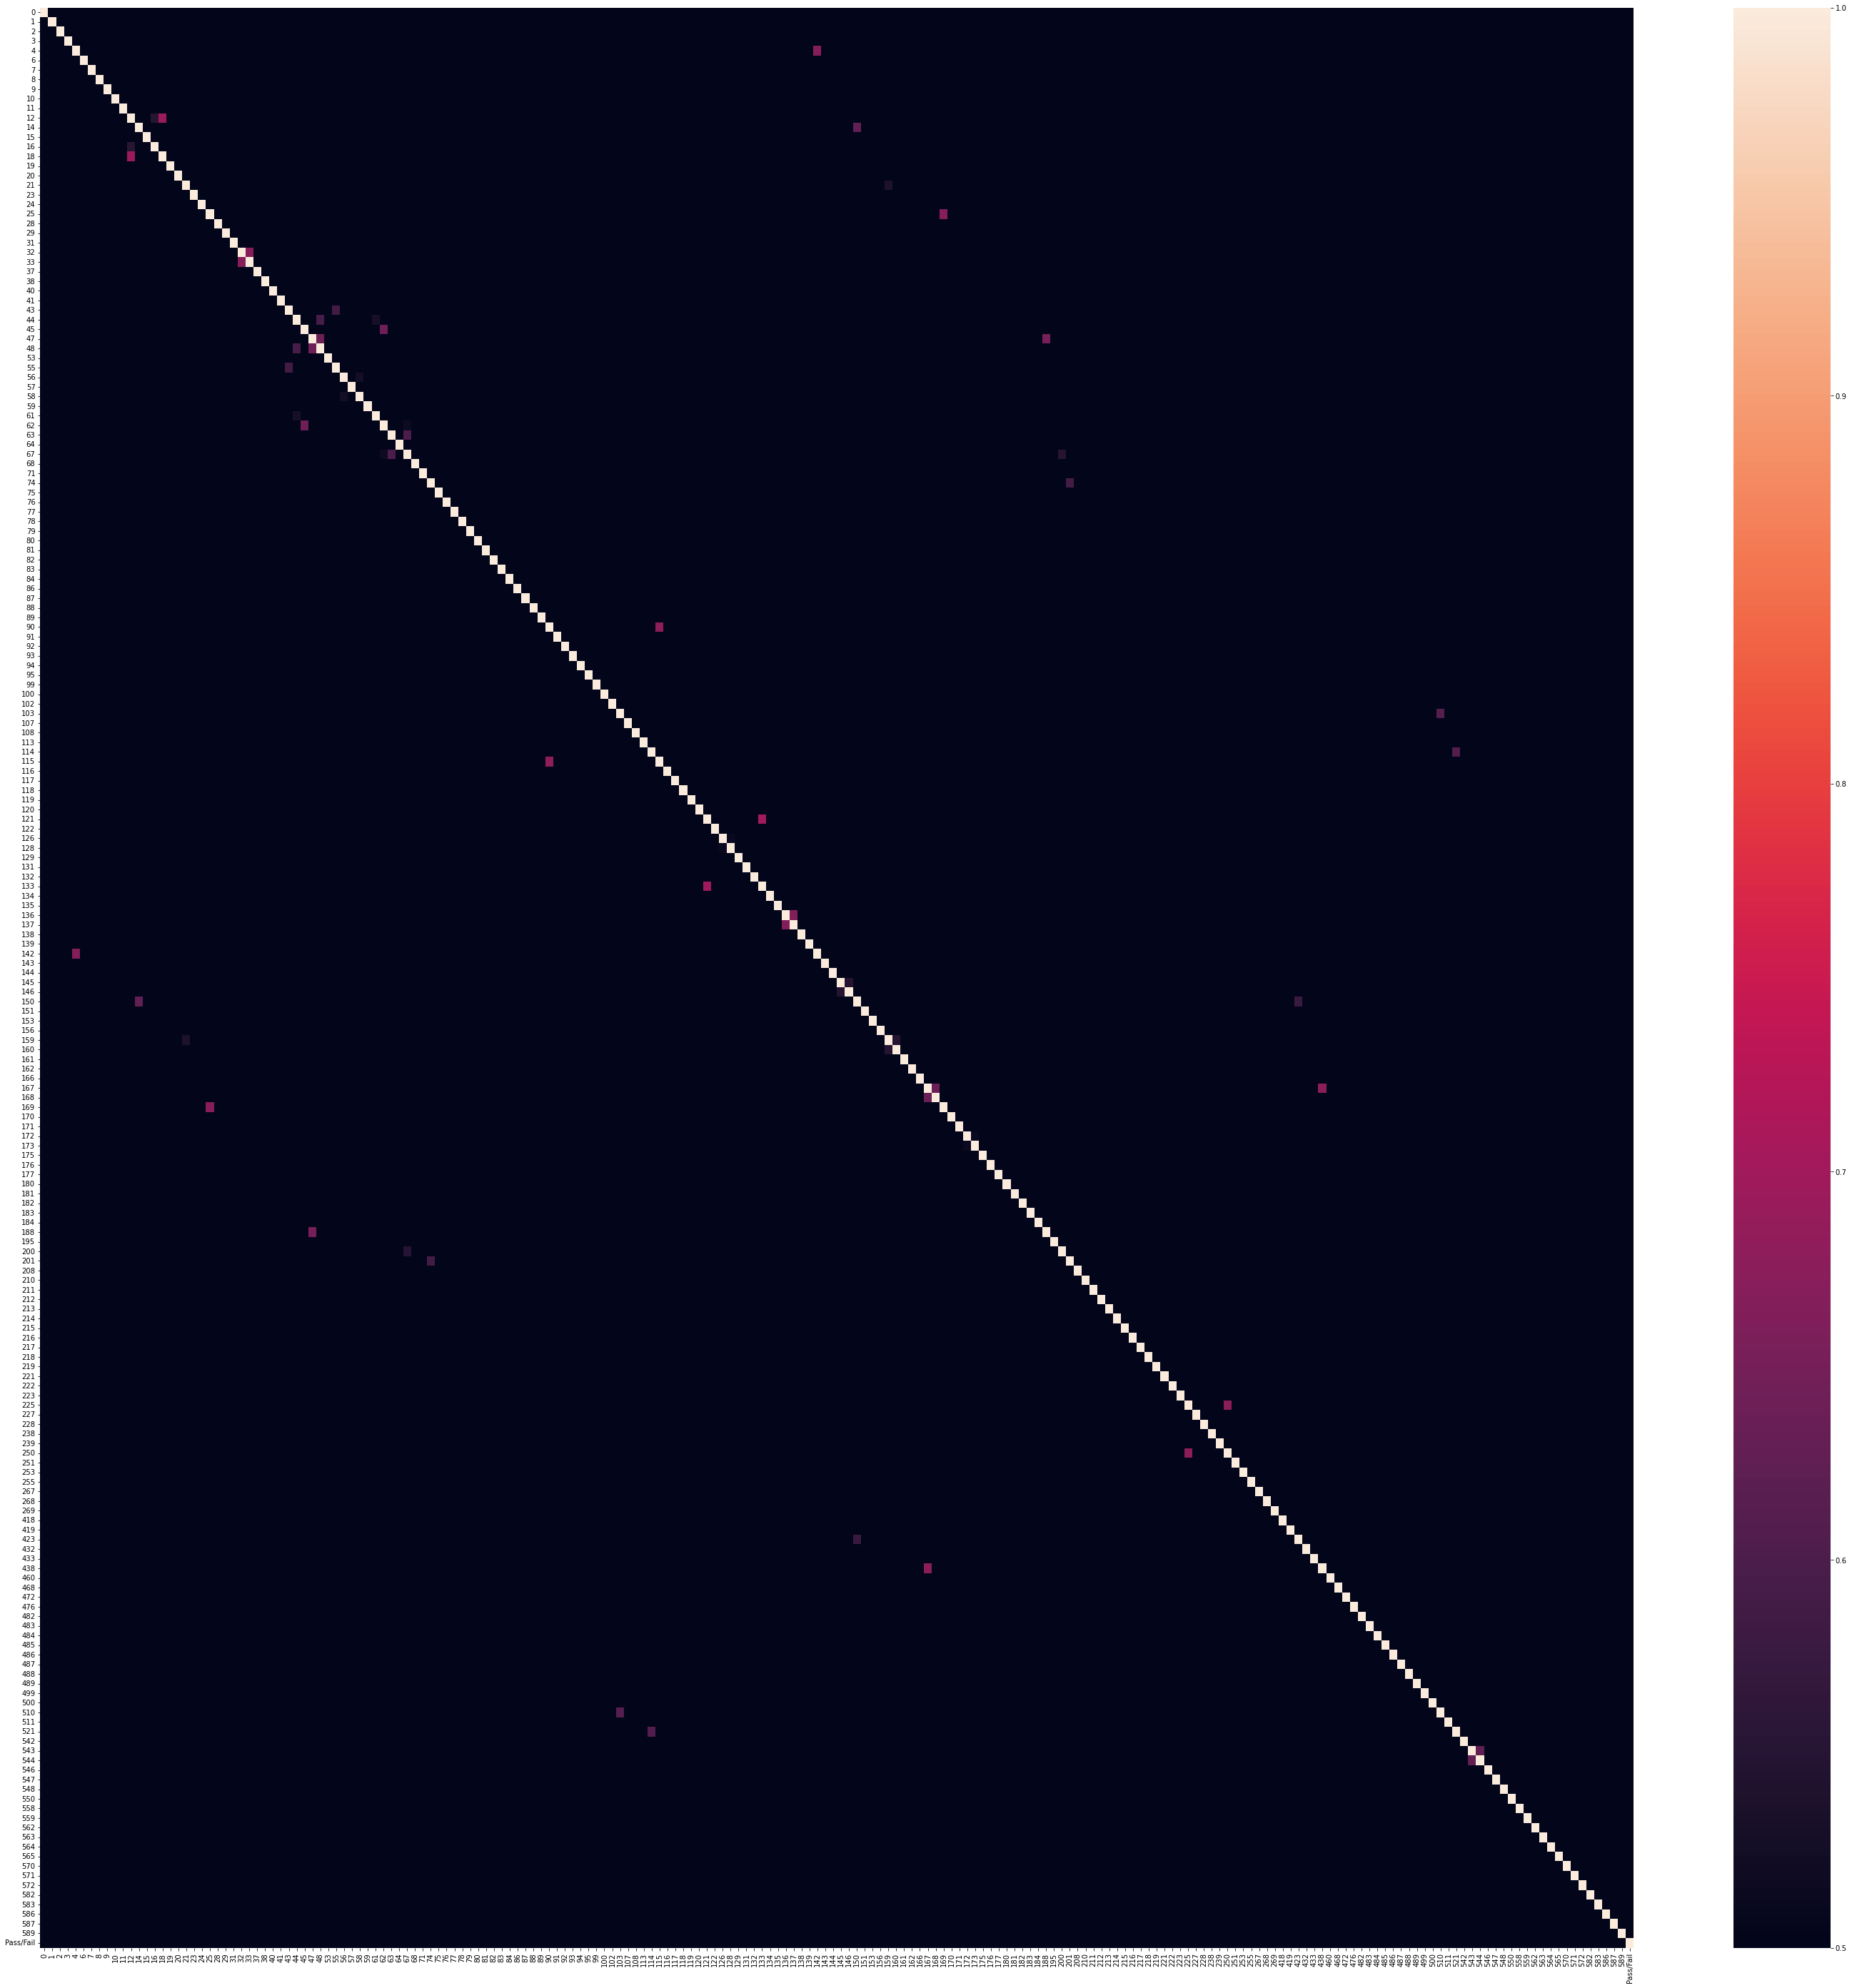

In [25]:
fig, ax = plt.subplots(figsize=(50,50))  
sns.heatmap(corrMatrix,0.5)
plt.show()

Observation : 
 Most of features has doesn't have correlation . Becuase already we removed features having more 70% correlation

# 4. Data pre-processing

4.A. Segregate predictors vs target attributes.

In [26]:
# Arrange data into independent variables and dependent variables
y=df['Pass/Fail']
X=df.drop(['Pass/Fail'],axis=1)

4.B. Check for target balancing and fix it if found imbalanced. 

In [27]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

Data is imbalance between -1,1.So we will do oversample

In [28]:
X_over, y_over = oversample.fit_resample(X, y)

In [29]:
y_over.value_counts()

-1    1463
 1    1463
Name: Pass/Fail, dtype: int64

4.C. Perform train-test split and standardise the data or vice versa if required. 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=10)

In [31]:
pipe_lr = Pipeline([('scl', StandardScaler())])

In [32]:
X_train=pipe_lr.fit_transform(X_train)
X_test=pipe_lr.fit_transform(X_test)

4.D. Check if the train and test data have similar statistical characteristics when compared with original data.

In [33]:
X.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.441551,73.480841,2743.2400,2966.66500,3011.49000,3056.54000,3356.3500
1,1567.0,2495.866110,80.228143,2158.7500,2452.88500,2499.40500,2538.74500,2846.4400
2,1567.0,2200.551958,29.380973,2060.6600,2181.09995,2201.06670,2218.05550,2315.2667
3,1567.0,1395.383474,439.837330,0.0000,1083.88580,1285.21440,1590.16990,3715.0417
4,1567.0,4.171281,56.103721,0.6815,1.01770,1.31680,1.51880,1114.5366
6,1567.0,101.116476,6.209385,82.1311,97.93780,101.51220,104.53000,129.2522
7,1567.0,0.121825,0.008936,0.0000,0.12110,0.12240,0.12380,0.1286
8,1567.0,1.462860,0.073849,1.1910,1.41125,1.46160,1.51685,1.6564
9,1567.0,-0.000842,0.015107,-0.0534,-0.01080,-0.00130,0.00840,0.0749
10,1567.0,0.000146,0.009296,-0.0349,-0.00560,0.00040,0.00590,0.0530


In [34]:
X_train_df = pd.DataFrame(X_train)
X_train_df.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
0,2194.0,5.788948e-16,1.000228,-3.317875,-0.680283,-0.136262,0.543866,4.341457
1,2194.0,1.521243e-15,1.000228,-4.399281,-0.542260,0.054060,0.538736,4.590805
2,2194.0,1.237956e-14,1.000228,-4.552223,-0.759917,-0.033931,0.588571,3.724207
3,2194.0,-2.276362e-16,1.000228,-1.709379,-0.743939,-0.236848,0.488838,5.956214
4,2194.0,8.653060e-18,1.000228,-0.049400,-0.039004,-0.030471,-0.024130,33.139103
5,2194.0,-6.924978e-16,1.000228,-3.326588,-0.445971,0.027301,0.517347,4.763205
6,2194.0,-1.525386e-15,1.000228,-21.956885,-0.187450,0.010291,0.279937,1.160781
7,2194.0,1.695190e-15,1.000228,-4.113134,-0.657638,-0.028553,0.692957,2.787422
8,2194.0,4.675689e-17,1.000228,-3.575289,-0.605486,0.010627,0.557514,5.306429
9,2194.0,7.362691e-18,1.000228,-3.776959,-0.635218,0.039519,0.619370,5.490123


In [35]:
X_test_df = pd.DataFrame(X_test)
X_test_df.describe().transpose()    

,count,mean,std,min,25%,50%,75%,max
0,732.0,7.276890e-15,1.000684,-2.185075,-0.659571,-0.144246,0.533917,3.427766
1,732.0,-6.716698e-16,1.000684,-3.090055,-0.560818,0.045983,0.546470,3.668981
2,732.0,-5.575382e-16,1.000684,-4.851195,-0.750024,-0.061808,0.562047,4.019677
3,732.0,1.158757e-16,1.000684,-3.415972,-0.726693,-0.267616,0.578864,5.684693
4,732.0,-3.036240e-17,1.000684,-0.063052,-0.057284,-0.052366,-0.049429,19.107991
5,732.0,2.201866e-15,1.000684,-3.425556,-0.467071,0.062325,0.522790,3.391505
6,732.0,6.291643e-16,1.000684,-13.222649,-0.083778,0.057500,0.220513,0.644348
7,732.0,6.819075e-16,1.000684,-3.435507,-0.743003,0.003613,0.735872,2.897130
8,732.0,2.896893e-17,1.000684,-3.135579,-0.560479,0.004618,0.634048,3.082219
9,732.0,1.171649e-17,1.000684,-3.497506,-0.617140,0.036029,0.624951,4.212024


In [ ]:
Observation : 
    Train,Test data all the features are scaled to new values 

# 5. Model training, testing and tuning: 

5.A. Use any Supervised Learning technique to train a model.

LogisticRegression Model

In [36]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
Accuracy = logit.score(X_test, y_test) 
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9567000911577028
Accuracy on Test data: 0.8579234972677595


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
y_pred = logit.predict(X_test)
print(metrics.classification_report(y_test, logit_pred))

              precision    recall  f1-score   support

          -1       0.86      0.85      0.86       363
           1       0.86      0.86      0.86       369

    accuracy                           0.86       732
   macro avg       0.86      0.86      0.86       732
weighted avg       0.86      0.86      0.86       732



In [38]:
#Store the accuracy results for each model in a dataframe for final comparison
results_df = pd.DataFrame({'Method':['Logit Regression'], 'accuracy': Accuracy},index={'1'})
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923


5.B. Use cross validation techniques

In [39]:
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [40]:
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results.std())

Average accuracy:  0.9335080645161291
Standard Deviation:  0.07012100252276122


In [41]:
accuracy=np.mean(results)

In [42]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Logit Regression K Fold '], 'accuracy': [accuracy]},index={'2'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508


Bootstrap samples - To Give Confidence to Deploy in Production

In [43]:
values =df.values

In [44]:
n_iterations = 50              # Number of bootstrap samples to create
n_size = int(len(df) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = LogisticRegression()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9290254237288136


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9265477439664218


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9315508021390374


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.934020618556701


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9295624332977588


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9272918861959958


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9216101694915254


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9294605809128631


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.916241062308478


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9091869060190074


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9368983957219251


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9291754756871036


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9252136752136753


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9454926624737946


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9232386961093586


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9188900747065102


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9141039236479321


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9118895966029724


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9140708915145005


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9241306638566913


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9365750528541226


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9157894736842105


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9234042553191489


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9219409282700421


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9233193277310925


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9318658280922432


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9236401673640168


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9135416666666667


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9158004158004158


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9288747346072187


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9197080291970803


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9258872651356994


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9190871369294605


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9336188436830836


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9262381454162276


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9288702928870293


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9257322175732218


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9271047227926078


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9109947643979057


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9342379958246346


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9241164241164241


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9138297872340425


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.911578947368421


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9256900212314225


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9228362877997914


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9094827586206896


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9242902208201893


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9224318658280922


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9372384937238494
0.9221748400852878


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


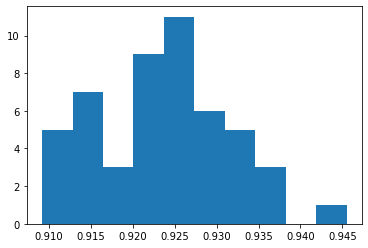

95.0 confidence interval 91.0% and 93.7%


In [45]:
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [46]:
loocv = LeaveOneOut()
# enumerate splits

In [47]:
results=cross_val_score(model,X,y,cv=loocv)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [48]:
print(np.mean(results))

0.9329929802169751


In [49]:
accuracy=np.mean(results)

In [50]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Logit Regression loocv '], 'accuracy': [accuracy]},index={'3'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993


In [ ]:
StratifiedKFold Is not tested here because Target imbalance already done 

5.C. Apply hyper-parameter tuning techniques to get the best accuracy. 

Grid Search 

In [51]:
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

In [52]:
logit_model_GV = GridSearchCV(logit,param_grid,cv=10)

In [53]:
logit_model_GV.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [54]:
# print the best score and estimator 
print(logit_model_GV.best_score_)
print(logit_model_GV.best_estimator_.get_params())

0.9215753424657533
{'C': 1000.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [55]:
accuracy=logit_model_GV.best_score_

In [56]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Logit Regression Grid SearchCV '], 'accuracy': [accuracy]},index={'4'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575


RandomizedSearchCV

In [57]:
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

In [58]:
randomCV_model = RandomizedSearchCV(logit, param_distributions=param_grid, n_iter=20) #default cv = 3

In [59]:
randomCV_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=20. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2']})

In [60]:
# print the best score and estimator 
print(randomCV_model.best_score_)
print(randomCV_model.best_estimator_.get_params())

0.9179496780769911
{'C': 10.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [61]:
accuracy =randomCV_model.best_score_

In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Logit Regression Random SearchCV '], 'accuracy': [accuracy]},index={'5'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950


5.D. Use any other technique/method which can enhance the model performance.

standardisation/normalisation  - Already done 
target balancing  - Already done using upsampling 

PCA

In [63]:
X_over.shape

(2926, 201)

In [64]:
pca = PCA(n_components=150)
pca.fit(X_over)
pca_model = pca.transform(X_over)

In [65]:
X_PCA=pca_model
y_PCA= y_over

In [66]:
# Split X and y into training and test set in 70:30 ratio
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.25, random_state=10)

In [67]:
logit_PCA = LogisticRegression()
logit_PCA.fit(X_train_PCA, y_train_PCA)
logit_pred_PCA = logit_PCA.predict(X_test_PCA)

print('Accuracy on Training data:',logit_PCA.score(X_train_PCA, y_train_PCA) )
print('Accuracy on Test data:',logit_PCA.score(X_test_PCA, y_test) )

Accuracy on Training data: 0.6841385597082954
Accuracy on Test data: 0.6338797814207651


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
accuracy =logit_PCA.score(X_test_PCA, y_test_PCA)
accuracy

0.6338797814207651

In [69]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Logit Regression PCA '], 'accuracy': [accuracy]},index={'6'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880


5.E Display and explain the classification report in detail

In [70]:
y_pred = logit.predict(X_test)
print(metrics.classification_report(y_test, logit_pred))

              precision    recall  f1-score   support

          -1       0.86      0.85      0.86       363
           1       0.86      0.86      0.86       369

    accuracy                           0.86       732
   macro avg       0.86      0.86      0.86       732
weighted avg       0.86      0.86      0.86       732



Observartion : 
    Without K-fold/Grid Search CV accuracy score is low as 86
    PCA reduced accuracy due to features reduction 
            

KNeighborsClassifier

5.F. Apply the above steps for all possible models that you have learnt so far

KNeighborsClassifier

In [71]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) 
fitted_model=KNN.fit(X_train, y_train)

In [72]:
y_pred = fitted_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
accuracy_score=metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy Score",accuracy_score)

              precision    recall  f1-score   support

          -1       1.00      0.83      0.91       363
           1       0.86      1.00      0.92       369

    accuracy                           0.92       732
   macro avg       0.93      0.92      0.92       732
weighted avg       0.93      0.92      0.92       732

Accuracy Score 91.66666666666666


In [73]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN '], 'accuracy': [accuracy_score/100]},index={'7'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880
7,KNN,0.916667


In [74]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds)
model = KNeighborsClassifier()
results = cross_val_score(model, X, y, cv=kfold)

In [75]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.347% (6.638%)


In [76]:
accuracy =results.mean()

In [77]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN  K Fold'], 'accuracy': [accuracy]},index={'8'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880
7,KNN,0.916667
8,KNN K Fold,0.933468


In [78]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [79]:
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [80]:
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [81]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 96.81%


In [82]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN  Grid Serach CV'], 'accuracy': [accuracy/100]},index={'9'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880
7,KNN,0.916667
8,KNN K Fold,0.933468
9,KNN Grid Serach CV,0.968095


DecisionTreeClassifier

In [83]:
 dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) 

In [84]:
fitted_model=dTree.fit(X_train, y_train)  

In [85]:
y_pred = fitted_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
accuracy_score=metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy ",accuracy_score)

              precision    recall  f1-score   support

          -1       0.71      0.94      0.81       363
           1       0.91      0.62      0.74       369

    accuracy                           0.78       732
   macro avg       0.81      0.78      0.77       732
weighted avg       0.81      0.78      0.77       732

Accuracy  77.8688524590164


In [86]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [accuracy_score/100]},index={'9'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880
7,KNN,0.916667
8,KNN K Fold,0.933468
9,KNN Grid Serach CV,0.968095
9,Decision Tree,0.778689


In [87]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, y, cv=kfold)

In [88]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 86.667% (10.604%)


In [89]:
accuracy_score =results.mean()

In [90]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree K fold'], 'accuracy': [accuracy_score]},index={'10'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880
7,KNN,0.916667
8,KNN K Fold,0.933468
9,KNN Grid Serach CV,0.968095
9,Decision Tree,0.778689


Grid Search CV 

In [91]:
n_components = list(range(1,df.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [92]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [93]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 96.81%


In [94]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree Grid Search CV'], 'accuracy': [accuracy/100]},index={'11'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880
7,KNN,0.916667
8,KNN K Fold,0.933468
9,KNN Grid Serach CV,0.968095
9,Decision Tree,0.778689


SVM

In [95]:
svm_m = svm.SVC(gamma=0.025, C=3)  

In [96]:
fitted_model=svm_m.fit(X_train, y_train)
y_pred = fitted_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
accuracy_score=metrics.accuracy_score(y_test,y_pred)*100

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00       363
           1       1.00      0.99      1.00       369

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



In [97]:
accuracy_score

99.72677595628416

In [98]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'accuracy': [accuracy_score/100]},index={'12'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880
7,KNN,0.916667
8,KNN K Fold,0.933468
9,KNN Grid Serach CV,0.968095
9,Decision Tree,0.778689


In [99]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds)
results = cross_val_score(svm_m, X_train, y_train, cv=kfold)

In [100]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 100.000% (0.000%)


In [101]:
accuracy_score =results.mean()

In [102]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVM K Fold'], 'accuracy': [accuracy_score]},index={'12'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880
7,KNN,0.916667
8,KNN K Fold,0.933468
9,KNN Grid Serach CV,0.968095
9,Decision Tree,0.778689


Grid Search CV

In [103]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [104]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [105]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.672 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.663 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.672 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.649 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.662 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.941 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [106]:
grid_predictions = grid.predict(X_test)

In [107]:
grid_predictions_Train=grid.predict(X_test)

In [108]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVM K Fold Grid Search CV '], 'accuracy': [accuracy/100]},index={'13'})
tempResultsDf
results_df = pd.concat([results_df, tempResultsDf])
results_df = results_df[['Method', 'accuracy']]
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880
7,KNN,0.916667
8,KNN K Fold,0.933468
9,KNN Grid Serach CV,0.968095
9,Decision Tree,0.778689


# 6. Post Training and Conclusion:

6.A. Display and compare all the models designed with their train and test accuracies. 

In [109]:
results_df

,Method,accuracy
1,Logit Regression,0.857923
2,Logit Regression K Fold,0.933508
3,Logit Regression loocv,0.932993
4,Logit Regression Grid SearchCV,0.921575
5,Logit Regression Random SearchCV,0.917950
6,Logit Regression PCA,0.633880
7,KNN,0.916667
8,KNN K Fold,0.933468
9,KNN Grid Serach CV,0.968095
9,Decision Tree,0.778689


6.B. Select the final best trained model along with your detailed comments for selecting this model.

1.SVM model is overfitting
2.Logit is  best model with all folding/Hyper testing
3.Also confidence level 95 % in boot strap sampling

6.C. Pickle the selected model for future use.

In [110]:
pickle.dump(logit,open('models/Best_performing_model_'+'logit'+'.p','wb'))

6.D  Write your conclusion on the results.

We selected the logit model. Becuase bootstrap smapling giving 95.0 confidence interval 91.0% and 93.7%
Actual Data set has lot of features which is continuous values
Lot features having Std as 0 which menas it has unique values .It is removed to build the model 
